# Clustering

In [1]:
# imports
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import ipywidgets as widgets

In [2]:
ladf = gpd.read_file('data/Local_Authority_Districts_(December_2020)_UK_BFC.zip!Local_Authority_Districts_(December_2020)_UK_BFC.shp')
ladf

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.676140,9.371263e+07,71007.443285,"MULTIPOLYGON (((447213.899 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,"MULTIPOLYGON (((448609.900 521982.600, 448616...."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,"MULTIPOLYGON (((455932.335 527880.697, 455919...."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,"MULTIPOLYGON (((444157.002 527956.304, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...,...
374,375,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.698360,1.262399e+08,82544.775967,"POLYGON ((323898.201 211287.499, 324115.698 21..."
375,376,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.778271,8.503266e+08,224917.251559,"MULTIPOLYGON (((327830.799 231005.105, 327840...."
376,377,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.582310,1.904311e+08,153216.416923,"MULTIPOLYGON (((342211.900 194845.495, 342221...."
377,378,W06000023,Powys,Powys,302329,273255,-3.43531,52.348640,5.195311e+09,610132.027463,"POLYGON ((322392.901 334017.198, 322378.002 33..."


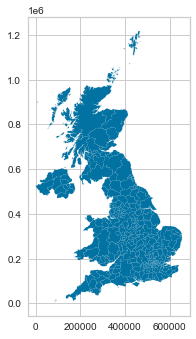

In [3]:
# using https://geopandas.org/en/v0.8.2/mapping.html
ladf.plot()
plt.show()

In [4]:
# get the case data
cases_df = pd.read_csv('data/ltla_caseData.csv')
cases_df.head()

,areaCode,areaName,areaType,date,newCasesByPublishDate,newDeaths28DaysByDeathDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate
0,E06000003,Redcar and Cleveland,ltla,2021-12-28,238.0,NaN,NaN,NaN
1,E07000040,East Devon,ltla,2021-12-28,243.0,NaN,NaN,NaN
2,E07000090,Havant,ltla,2021-12-28,232.0,NaN,NaN,NaN
3,E07000214,Surrey Heath,ltla,2021-12-28,154.0,NaN,NaN,NaN
4,E07000229,Worthing,ltla,2021-12-28,167.0,NaN,NaN,NaN


In [5]:
# get the census data
census_df = pd.read_csv("districtCensusData.csv")
census_df.head()

,geography,geography_code,dwelling_type_all_categories_accommodation_type,dwelling_type_unshared_dwelling_total,dwelling_type_unshared_dwelling_whole_house_or_bungalow_total,dwelling_type_unshared_dwelling_whole_house_or_bungalow_detached,dwelling_type_unshared_dwelling_whole_house_or_bungalow_semi-detached,dwelling_type_unshared_dwelling_whole_house_or_bungalow_terraced_(including_end-terrace),dwelling_type_unshared_dwelling_flat_maisonette_or_apartment_total,dwelling_type_unshared_dwelling_flat_maisonette_or_apartment_purpose-built_block_of_flats_or_tenement,...,method_of_travel_to_work_train,method_of_travel_to_work_bus_minibus_or_coach,method_of_travel_to_work_taxi,method_of_travel_to_work_motorcycle_scooter_or_moped,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment
0,Darlington,E06000005,104111.0,103979.0,95581.0,20750.0,42278,32553,8334.0,6748,...,862,3430.0,441,193,30531.0,3400.0,1170,6625,309.0,27621.0
1,County Durham,E06000047,500288.0,500209.0,481791.0,108279.0,187338,186174,17940.0,13491,...,1948,13963.0,1521,1061,154210.0,17707.0,2243,23797,1471.0,155902.0
2,Hartlepool,E06000001,91091.0,91063.0,84220.0,17724.0,31926,34570,6703.0,5739,...,481,2592.0,700,180,23871.0,3214.0,723,4514,414.0,29037.0
3,Middlesbrough,E06000002,136156.0,135987.0,125261.0,21120.0,58589,45552,10687.0,8972,...,718,4975.0,957,197,32508.0,4745.0,1397,7063,637.0,46004.0
4,Northumberland,E06000057,310591.0,310554.0,288741.0,86610.0,116600,85531,21362.0,16260,...,1952,7711.0,588,704,96053.0,9552.0,2137,16924,1411.0,86323.0


In [6]:
# merge the geographic and census data
df = ladf.merge(census_df, how='outer', left_on='LAD20CD', right_on='geography_code')
df.head()

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,...,method_of_travel_to_work_train,method_of_travel_to_work_bus_minibus_or_coach,method_of_travel_to_work_taxi,method_of_travel_to_work_motorcycle_scooter_or_moped,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment
0,1.0,E06000001,Hartlepool,None,447160.0,531474.0,-1.27018,54.676140,9.371263e+07,71007.443285,...,481.0,2592.0,700.0,180.0,23871.0,3214.0,723.0,4514.0,414.0,29037.0
1,2.0,E06000002,Middlesbrough,None,451141.0,516887.0,-1.21099,54.544670,5.388156e+07,44481.691242,...,718.0,4975.0,957.0,197.0,32508.0,4745.0,1397.0,7063.0,637.0,46004.0
2,3.0,E06000003,Redcar and Cleveland,None,464361.0,519597.0,-1.00608,54.567520,2.450695e+08,96703.989701,...,1193.0,3372.0,414.0,259.0,37919.0,4054.0,894.0,5731.0,733.0,42823.0
3,4.0,E06000004,Stockton-on-Tees,None,444940.0,518183.0,-1.30664,54.556911,2.049330e+08,123408.985928,...,1166.0,5115.0,642.0,417.0,60422.0,6160.0,1715.0,7518.0,1018.0,53532.0
4,5.0,E06000005,Darlington,None,428029.0,515648.0,-1.56835,54.535339,1.974757e+08,107206.401677,...,862.0,3430.0,441.0,193.0,30531.0,3400.0,1170.0,6625.0,309.0,27621.0


<AxesSubplot:>

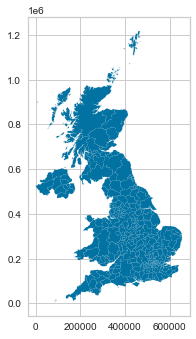

In [7]:
df.plot()

In [8]:
# find na data
df.isna().sum()

OBJECTID                                                     9
LAD20CD                                                      9
LAD20NM                                                      9
LAD20NMW                                                   366
BNG_E                                                        9
                                                          ... 
method_of_travel_to_work_passenger_in_a_car_or_van          45
method_of_travel_to_work_bicycle                            45
method_of_travel_to_work_on_foot                            45
method_of_travel_to_work_other_method_of_travel_to_work     45
method_of_travel_to_work_not_in_employment                  45
Length: 106, dtype: int64

In [9]:
# census data missing geography
df[df['LAD20NM'].isnull()][['geography_code','geography']]

,geography_code,geography
379,E07000201,Forest Heath
380,E07000204,St Edmundsbury
381,E07000206,Waveney
382,E07000004,Aylesbury Vale
383,E07000005,Chiltern
384,E07000006,South Bucks
385,E07000007,Wycombe
386,E07000051,Purbeck
387,E07000053,Weymouth and Portland


In [10]:
# geography missing census data
df[df['geography_code'].isnull() & ((df['LAD20CD'].str.startswith('E')) | (df['LAD20CD'].str.startswith('W')))]

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,...,method_of_travel_to_work_train,method_of_travel_to_work_bus_minibus_or_coach,method_of_travel_to_work_taxi,method_of_travel_to_work_motorcycle_scooter_or_moped,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment
49,50.0,E06000053,Isles of Scilly,None,91327.0,11447.0,-6.30217,49.923321,1.631775e+07,117979.580176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,57.0,E06000060,Buckinghamshire,None,482506.0,208561.0,-0.80569,51.769661,1.564949e+09,361853.598103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# create buckinghamshire data
census_bucks = census_df[census_df['geography_code'].isin(['E07000004', 'E07000005', 'E07000006', 'E07000007'])].sum()
census_bucks['geography'] = 'Buckinghamshire'
census_bucks['geography_code'] = 'E06000060'
#census_bucks.tolist()

# reset the dataframe
census_df = pd.read_csv("districtCensusData.csv")
census_df.loc[344] = census_bucks
#census_df.index = census_df.index + 1
# drop the counties
census_df.drop(census_df[census_df['geography_code'].isin(['E07000004', 'E07000005', 'E07000006', 'E07000007'])].index, inplace=True)
census_df

,geography,geography_code,dwelling_type_all_categories_accommodation_type,dwelling_type_unshared_dwelling_total,dwelling_type_unshared_dwelling_whole_house_or_bungalow_total,dwelling_type_unshared_dwelling_whole_house_or_bungalow_detached,dwelling_type_unshared_dwelling_whole_house_or_bungalow_semi-detached,dwelling_type_unshared_dwelling_whole_house_or_bungalow_terraced_(including_end-terrace),dwelling_type_unshared_dwelling_flat_maisonette_or_apartment_total,dwelling_type_unshared_dwelling_flat_maisonette_or_apartment_purpose-built_block_of_flats_or_tenement,...,method_of_travel_to_work_train,method_of_travel_to_work_bus_minibus_or_coach,method_of_travel_to_work_taxi,method_of_travel_to_work_motorcycle_scooter_or_moped,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment
0,Darlington,E06000005,104111.0,103979.0,95581.0,20750.0,42278,32553,8334.0,6748,...,862,3430.0,441,193,30531.0,3400.0,1170,6625,309.0,27621.0
1,County Durham,E06000047,500288.0,500209.0,481791.0,108279.0,187338,186174,17940.0,13491,...,1948,13963.0,1521,1061,154210.0,17707.0,2243,23797,1471.0,155902.0
2,Hartlepool,E06000001,91091.0,91063.0,84220.0,17724.0,31926,34570,6703.0,5739,...,481,2592.0,700,180,23871.0,3214.0,723,4514,414.0,29037.0
3,Middlesbrough,E06000002,136156.0,135987.0,125261.0,21120.0,58589,45552,10687.0,8972,...,718,4975.0,957,197,32508.0,4745.0,1397,7063,637.0,46004.0
4,Northumberland,E06000057,310591.0,310554.0,288741.0,86610.0,116600,85531,21362.0,16260,...,1952,7711.0,588,704,96053.0,9552.0,2137,16924,1411.0,86323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,East Suffolk,E07000244,60895.5,60847.5,56914.5,28714.5,18546,9654,3591.5,2623,...,628,702.5,68,324,19449.5,1246.5,1356,2795,171.5,14996.5
340,West Suffolk,E07000245,60895.5,60847.5,56914.5,28714.5,18546,9654,3591.5,2623,...,628,702.5,68,324,19449.5,1246.5,1356,2795,171.5,14996.5
341,"Bournemouth, Christchurch and Poole",E06000058,371539.0,368979.0,268020.0,150964.0,75547,41509,100118.0,69998,...,3160,12393.0,548,2300,112191.0,9267.0,8702,20906,1239.0,95414.0
342,Cornwall,E06000052,525555.0,525021.0,474629.0,208536.0,143082,123011,44978.0,29764,...,2464,5961.0,743,2909,157998.0,12931.0,4159,34619,2472.0,144642.0


In [12]:
df = ladf.merge(census_df, how='outer', left_on='LAD20CD', right_on='geography_code')
df

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,...,method_of_travel_to_work_train,method_of_travel_to_work_bus_minibus_or_coach,method_of_travel_to_work_taxi,method_of_travel_to_work_motorcycle_scooter_or_moped,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment
0,1.0,E06000001,Hartlepool,None,447160.0,531474.0,-1.27018,54.676140,9.371263e+07,71007.443285,...,481.0,2592.0,700.0,180.0,23871.0,3214.0,723.0,4514.0,414.0,29037.0
1,2.0,E06000002,Middlesbrough,None,451141.0,516887.0,-1.21099,54.544670,5.388156e+07,44481.691242,...,718.0,4975.0,957.0,197.0,32508.0,4745.0,1397.0,7063.0,637.0,46004.0
2,3.0,E06000003,Redcar and Cleveland,None,464361.0,519597.0,-1.00608,54.567520,2.450695e+08,96703.989701,...,1193.0,3372.0,414.0,259.0,37919.0,4054.0,894.0,5731.0,733.0,42823.0
3,4.0,E06000004,Stockton-on-Tees,None,444940.0,518183.0,-1.30664,54.556911,2.049330e+08,123408.985928,...,1166.0,5115.0,642.0,417.0,60422.0,6160.0,1715.0,7518.0,1018.0,53532.0
4,5.0,E06000005,Darlington,None,428029.0,515648.0,-1.56835,54.535339,1.974757e+08,107206.401677,...,862.0,3430.0,441.0,193.0,30531.0,3400.0,1170.0,6625.0,309.0,27621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,253.0,574.0,121.0,235.0,22429.0,1844.0,1156.0,3299.0,168.0,12513.0
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,623.0,1409.0,291.0,400.0,37339.0,3268.0,1740.0,7845.0,283.0,24485.0
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,548.0,1317.0,252.0,567.0,31732.0,2676.0,3048.0,5629.0,827.0,32696.0
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,419.0,390.0,42.0,285.0,13900.0,1036.0,634.0,2808.0,182.0,10960.0


In [13]:
# some up the cases
cases_sum = cases_df.groupby('areaCode').sum()

# merge the buckinghamshire cases and drop them
cases_bucks = cases_sum[cases_sum.index.isin(['E07000004', 'E07000005', 'E07000006', 'E07000007'])].sum()
cases_sum.loc['E06000060'] = cases_bucks
cases_sum.drop(['E07000004', 'E07000005', 'E07000006', 'E07000007'], inplace=True)
cases_sum

,newCasesByPublishDate,newDeaths28DaysByDeathDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate
areaCode,,,,
E06000001,19707.0,292.0,69298.0,63764.0
E06000002,29779.0,393.0,103706.0,93951.0
E06000003,27090.0,358.0,106165.0,98606.0
E06000004,39997.0,508.0,149248.0,136953.0
E06000005,21159.0,294.0,83417.0,76876.0
...,...,...,...,...
W06000021,24981.0,0.0,0.0,0.0
W06000022,53944.0,0.0,0.0,0.0
W06000023,32448.0,0.0,0.0,0.0


In [14]:
# join df and cases_sum
df = df.merge(cases_sum, how='outer', left_on='LAD20CD', right_on=cases_sum.index)
df

,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,...,method_of_travel_to_work_driving_a_car_or_van,method_of_travel_to_work_passenger_in_a_car_or_van,method_of_travel_to_work_bicycle,method_of_travel_to_work_on_foot,method_of_travel_to_work_other_method_of_travel_to_work,method_of_travel_to_work_not_in_employment,newCasesByPublishDate,newDeaths28DaysByDeathDate,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate
0,1.0,E06000001,Hartlepool,None,447160.0,531474.0,-1.27018,54.676140,9.371263e+07,71007.443285,...,23871.0,3214.0,723.0,4514.0,414.0,29037.0,19707.0,292.0,69298.0,63764.0
1,2.0,E06000002,Middlesbrough,None,451141.0,516887.0,-1.21099,54.544670,5.388156e+07,44481.691242,...,32508.0,4745.0,1397.0,7063.0,637.0,46004.0,29779.0,393.0,103706.0,93951.0
2,3.0,E06000003,Redcar and Cleveland,None,464361.0,519597.0,-1.00608,54.567520,2.450695e+08,96703.989701,...,37919.0,4054.0,894.0,5731.0,733.0,42823.0,27090.0,358.0,106165.0,98606.0
3,4.0,E06000004,Stockton-on-Tees,None,444940.0,518183.0,-1.30664,54.556911,2.049330e+08,123408.985928,...,60422.0,6160.0,1715.0,7518.0,1018.0,53532.0,39997.0,508.0,149248.0,136953.0
4,5.0,E06000005,Darlington,None,428029.0,515648.0,-1.56835,54.535339,1.974757e+08,107206.401677,...,30531.0,3400.0,1170.0,6625.0,309.0,27621.0,21159.0,294.0,83417.0,76876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22429.0,1844.0,1156.0,3299.0,168.0,12513.0,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37339.0,3268.0,1740.0,7845.0,283.0,24485.0,NaN,NaN,NaN,NaN
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31732.0,2676.0,3048.0,5629.0,827.0,32696.0,NaN,NaN,NaN,NaN
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13900.0,1036.0,634.0,2808.0,182.0,10960.0,NaN,NaN,NaN,NaN


## Look for interactions

In [28]:
cols = census_df.columns.to_list()[2:]
# relative cases
df['relativeCases'] = df['newCasesByPublishDate'] / (df['00_59'] + df['60+'])

@widgets.interact(run_graphs=False)
def graphrunner(run_graphs):
    if run_graphs:
        for col in cols:
            print(col)
            print(df[['relativeCases', col]].corr().iloc[0,1])
            tmp = df[col] / (df['00_59'] + df['60+'])
            sns.regplot(data=df, x=tmp, y='relativeCases')
            plt.xlabel(col)
            plt.title('relative')
            plt.show()
            sns.regplot(data=df, x=col, y='relativeCases')
            plt.title('Absolute')
            plt.show()

interactive(children=(Checkbox(value=False, description='run_graphs'), Output()), _dom_classes=('widget-intera…

## Clustering

In [38]:
# interact from https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
@widgets.interact(num_clusters=widgets.IntSlider(min=2, max=50, step=1))
def clusterify(num_clusters, show_output=True):
    # Get the interesting columns
    icols = pd.read_csv('interestingcolumns.txt', header=None)
    icols.columns = ['name']
    icols = icols['name'].tolist()

    # subset df to just England and Wales
    d = df[((df['LAD20CD'].str.startswith('E')) | (df['LAD20CD'].str.startswith('W'))) & (df['00_59'] > 0) & (df['60+'] > 0)].copy()
    

    # Subset the dataframe to the specific columns
    X = d[icols].copy()

    # Fill NA
    X.fillna(0, inplace=True)

    pop_59 = d['00_59']
    pop_60 = d['60+']
    pop_59 = pop_59.fillna(0)
    pop_60 = pop_60.fillna(0)

    # Relative population
    for c in icols:
        if c == '00_59' or c == '60+':
            pass
        else:
            X[c] = X[c] / (pop_59 + pop_60)
    X.fillna(0, inplace=True)

    # Using code from https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
    mdl = KMeans(num_clusters, random_state=42)
    visuals = SilhouetteVisualizer(mdl, colors='yellowbrick')
    visuals.fit(X)
    if show_output:
        visuals.show()
        plt.show()

        # Print the score
        print('Score:', visuals.silhouette_score_)
    else:
        plt.clf()
    

    if show_output:
        # set the clusters
        d['cluster'] = mdl.labels_

        # Show on the map
        d.plot(column='cluster', legend=True, cmap='rainbow')
        plt.title('England and Wales in clusters')
        plt.show()
    else:
        return visuals.silhouette_score_

interactive(children=(IntSlider(value=2, description='num_clusters', max=50, min=2), Checkbox(value=True, desc…

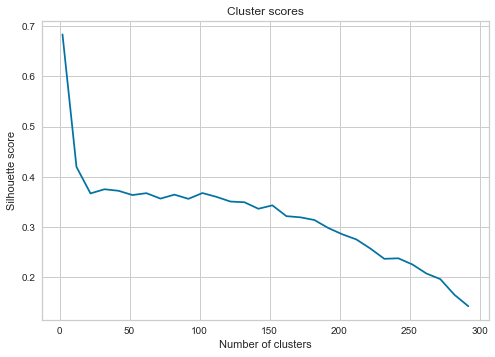

In [33]:
def numclusters(n,step):
    srs = [clusterify(i, False) for i in range(2,n,step)]
    plt.plot(range(2,n,step), srs)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Cluster scores')
    plt.show()
numclusters(300, 10)